# Homework 1

> - **Title**:       Homework 01: Classification models
> - **Author**:      Ana Parra Vera
> - **Affiliation**: UC Davis MSBA Program
> - **Description**: BAX-453 – Application Domains
> - **Date**:        2020-04-24


## Table of Contents:

1. [Background](#background)
2. [Imports](#packages)
3. [Reading the data](#reads)
4. [Exploratory Data Analysis (EDA)](#exploration)
5. [Pre-processing](#preprocess)
6. [Modeling](#models)
7. [Model Benchmarking](#benchmarks)


<a id="background"></a> <br> 
## 1. Background

**Context**: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


**Data source**: https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv

**Goal**: This Colab notebook will evaluate different classification algorithms predicting whether or not a person has diabetes.

<a id="packages"></a> <br> 
## 2. Import packages

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from google.colab import (drive, files) # mount google drive data to colab
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC  # Support Vector Machines
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# connect to drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive"
os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


<a id="reads"></a> <br> 
## 3. Reading the data

In [0]:
# read the file
filepath = "My Drive/Spring 2020/BAX453-AppDomain/Week-04/Homework-01/diabetes.csv"
diabetes = pd.read_csv(filepath)

# change column names to lowercase
diabetes.columns = diabetes.columns.str.lower()

# preview the dataframe
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<a id="exploration"></a> <br> 
## 4. Exploratory Data Analysis (EDA)
- Data descriptions
- All distributions (diabetes vs. no diabetes)
- More details about each independent variable
- Correlations


### Data description

The following features have been provided to help us predict whether a person is diabetic or not:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- **Age**: Age (years)
- **Outcome**: Class variable (0 if non-diabetic, 1 if diabetic)



In [0]:
# summary statistics
diabetes.describe(include='all')

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
diabetes.outcome.value_counts()

0    500
1    268
Name: outcome, dtype: int64

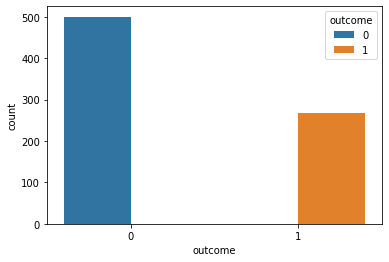

In [0]:
# distribution of target class (diabetes)
sns.countplot(x="outcome", data=diabetes, hue="outcome")

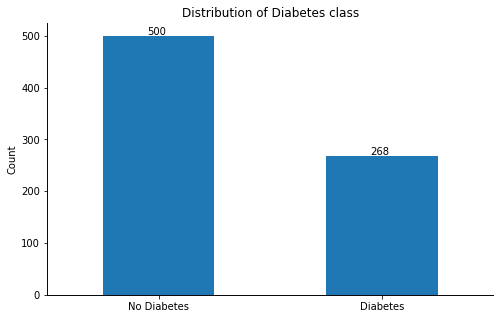

In [0]:
# distribution of target class (diabetes) with counts
plt.figure(figsize=(8,5))

plt.title('Distribution of Diabetes class')
plt.ylabel('Count')

# create barplot based on counts of diabetes class
ax = (diabetes.outcome.value_counts()).sort_index().plot(kind="bar", rot=0)

ax2 = ax.twinx()
sns.despine(right=True) # remove right y-axis
ax2.set_yticks([]) # remove right y ticks
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

# add count numbers to the top of each bar
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))


In [0]:
# averages per group
diabetes.groupby("outcome").mean().reset_index()

,outcome,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### All distributions (diabetes vs. no diabetes)

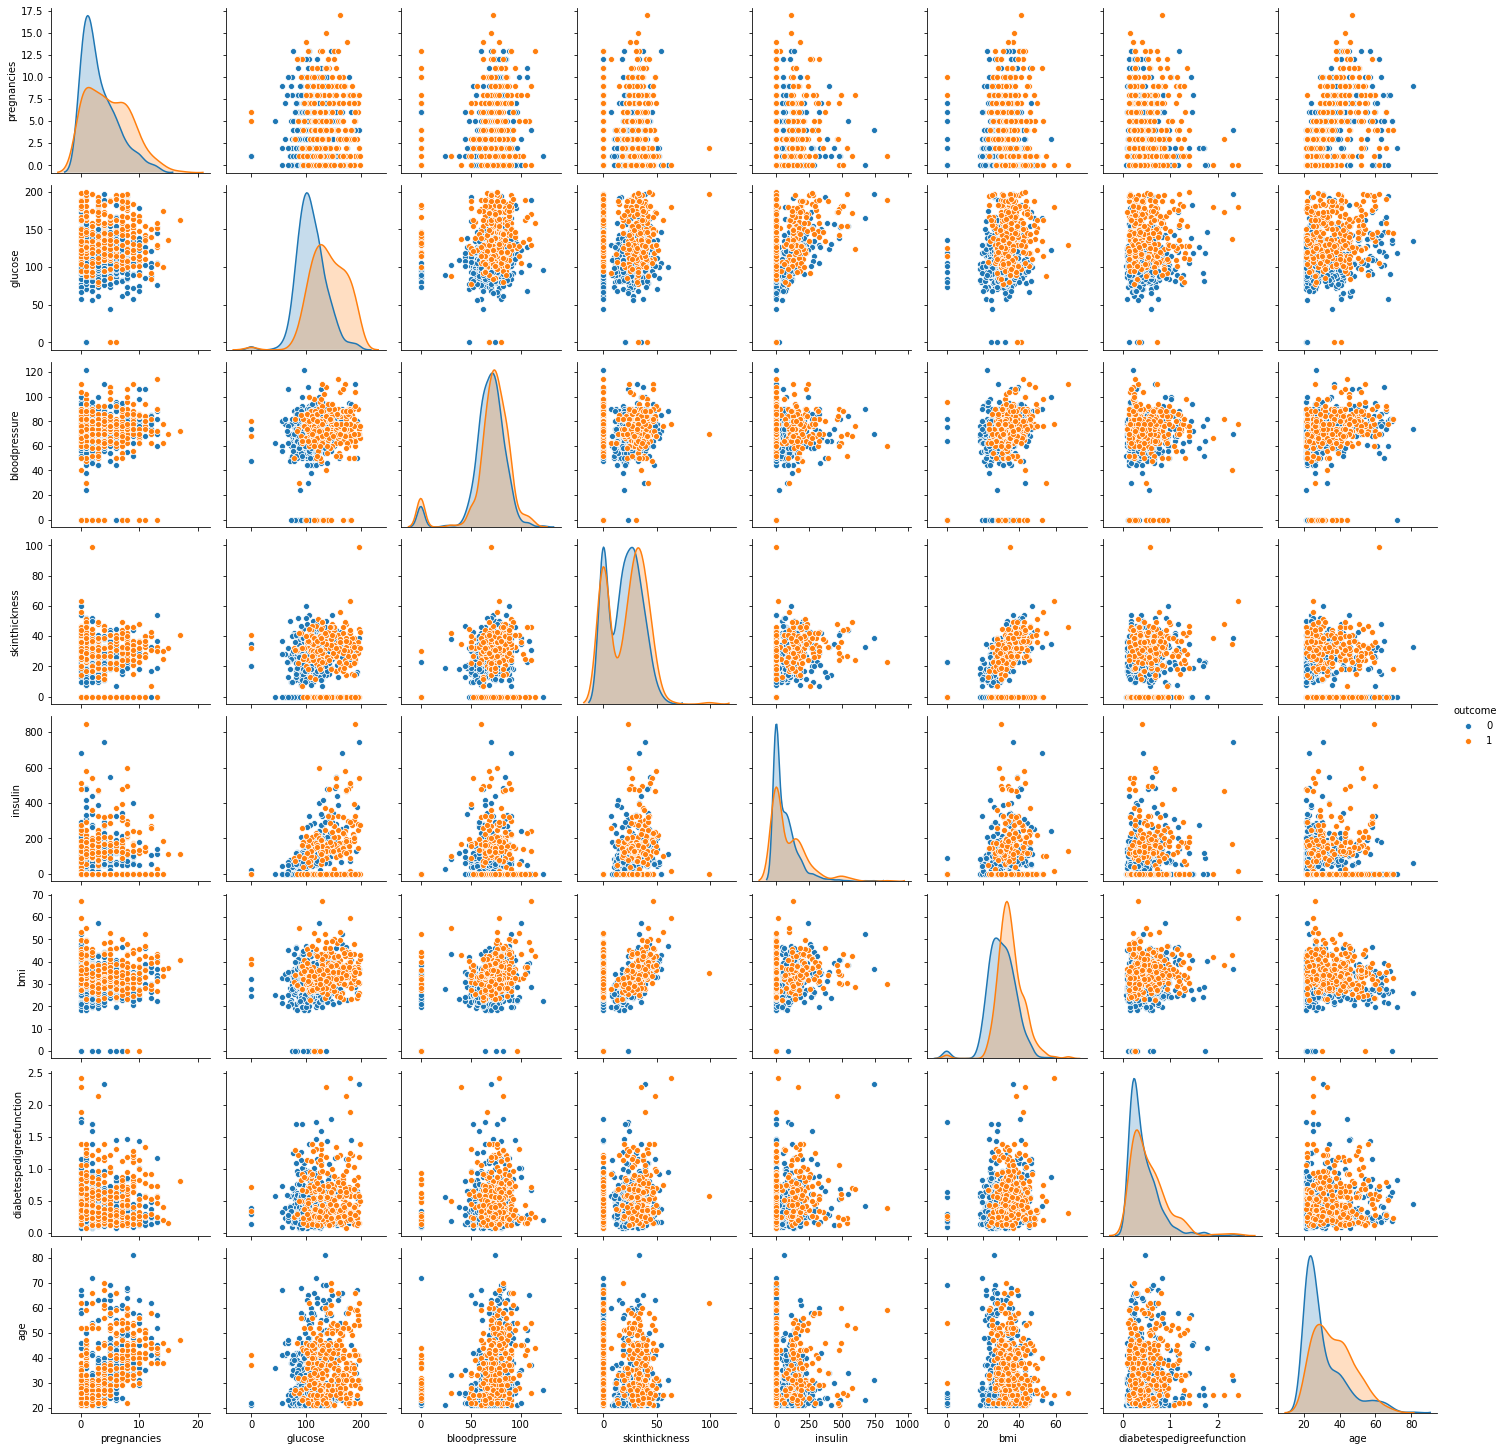

In [0]:
sns.pairplot(diabetes, hue="outcome")


### More details about each independent variable

In [0]:
def plot_var_counts(df, col, title=None):
  plt.figure(figsize=(8,4))

  # create each plot
  sns.distplot(df[df.outcome==1][col], kde=False, label="diabetes")
  sns.distplot(df[df.outcome==0][col], kde=False, label="no diabetes")

  # plot formatting
  plt.legend()
  if title:
    plot_title = 'Number of ' + title
  else:
    plot_title = 'Number of ' + col
  plt.title(plot_title)
  plt.ylabel('Count')

#### Pregnancies

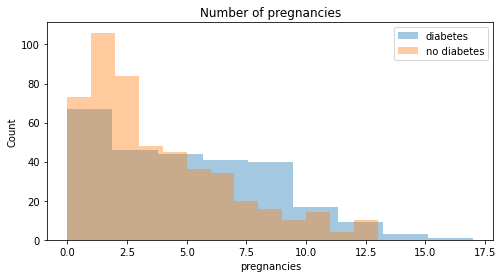

In [0]:
plot_var_counts(diabetes, 'pregnancies')

#### Glucose

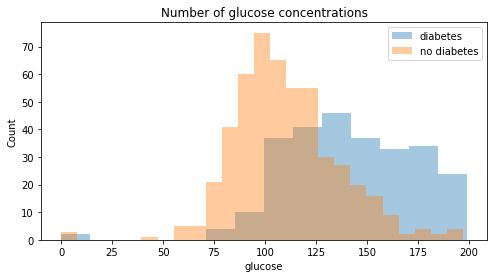

In [0]:
plot_var_counts(diabetes, 'glucose', 'glucose concentrations')

#### Blood Pressure


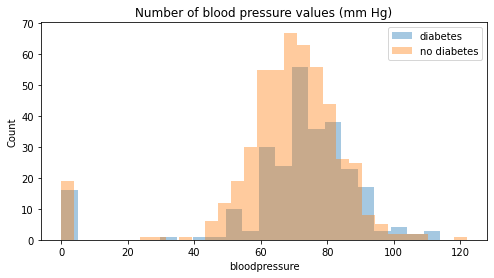

In [0]:
plot_var_counts(diabetes, 'bloodpressure', 'blood pressure values (mm Hg)')

#### Skin Thickness


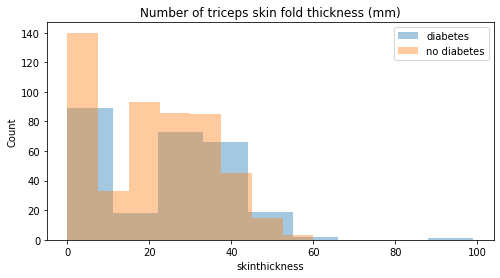

In [0]:
plot_var_counts(diabetes, 'skinthickness', 'triceps skin fold thickness (mm)')

#### Insulin


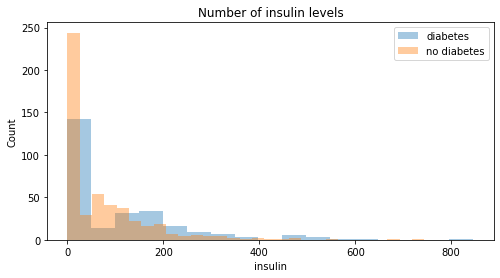

In [0]:
plot_var_counts(diabetes, 'insulin', 'insulin levels')

#### BMI

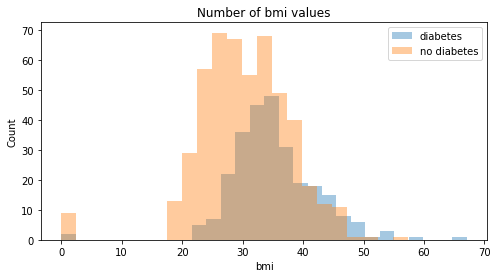

In [0]:
plot_var_counts(diabetes, 'bmi', 'bmi values')

#### Diabetes Pedigree Function

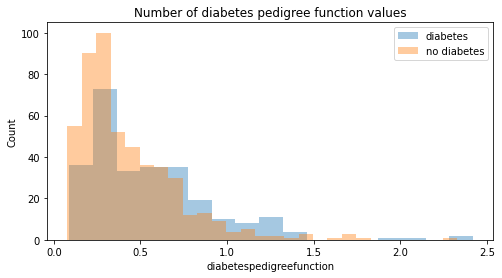

In [0]:
plot_var_counts(diabetes, 'diabetespedigreefunction', 'diabetes pedigree function values')

#### Age

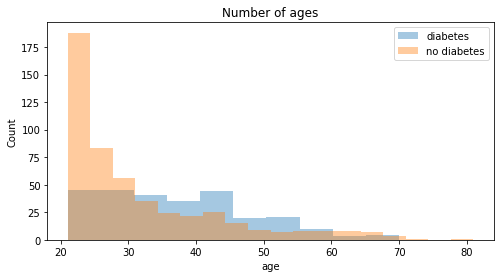

In [0]:
plot_var_counts(diabetes, 'age', 'ages')

### Correlations

In [0]:
# calculate correlations
diabetes_correlations = diabetes.corr()
diabetes_correlations

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


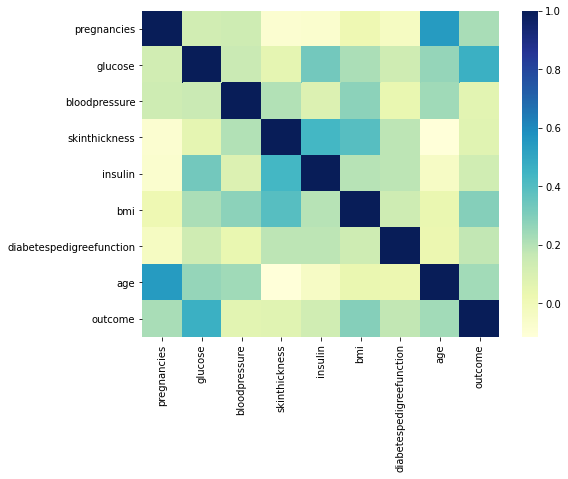

In [0]:
# plot correlations
plt.figure(figsize=(8,6))
sns.heatmap(diabetes_correlations, xticklabels=diabetes_correlations.columns, 
            yticklabels=diabetes_correlations.columns, cmap="YlGnBu")

<a id="preprocess"></a> <br> 
## 5. Pre-processing

### Setting features and target variables

In [0]:
# set names of feature columns (independent variables) and target column (dependent variable)
target_col = 'outcome'
num_cols = diabetes.columns.tolist()[:-1] # all column names minus the last one: outcome

# create features and target variables
features = diabetes[num_cols]
target = diabetes[target_col]

In [0]:
# preview the features
features.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Scaling the data

[Scaling the data](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) to make the range of the values be from 0 to 1.


In [0]:
# scale and preview features - doing manually instead of using MinMaxScaler() to preserve column names
features = (features-np.min(features))/(np.max(features)-np.min(features))
features.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


### Creating training and testing data sets

In [0]:
# create a 70-to-30 training and test split
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42)

# print the number of row and columns for the training and testing variables
print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(537, 8) (537,)
(231, 8) (231,)


<a id="models"></a> <br> 
## 6. Modeling

- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest



### Helper Functions

In [0]:
def plot_confusion_matrix(conf_matrix):
  # create confusion matrix plot
  plt.figure(figsize=(5,4))
  sns.heatmap(conf_matrix, annot=True, linewidths=0.5, fmt=".0f")
  # format plot
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [0]:
def get_model_performance(conf_matrix):
  tp_and_fn = conf_matrix.sum(1)[1]
  tp_and_fp = conf_matrix.sum(0)[1]
  tp = conf_matrix.diagonal()[1]

  precision = tp / tp_and_fp
  recall = tp / tp_and_fn
  print("Precision: {:.2%}".format(precision)) 
  print("Recall: {:.2%}".format(recall)) 


In [0]:
def plot_roc_curve(target_test, target_predicted):
  fpr, tpr, thresholds = roc_curve(target_test, target_predicted)

  roc_auc = roc_auc_score(target_test, target_predicted)

  print("AUC of ROC Curve: {:.2f}".format(roc_auc)) 
  plt.figure(figsize=(6,4))
  plt.plot(fpr, tpr)
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

### Logistic Regression

In [0]:
# defines a logistic regression model using lbfgs as a solver to avoid future warning messages
logistic_reg = LogisticRegression(solver='lbfgs', max_iter=250)

# train the model and predict values
result_logit = logistic_reg.fit(features_train, target_train)
target_predicted = logistic_reg.predict(features_test)
accuracy_logit = logistic_reg.score(features_test, target_test)

# print accuracy
print("Test Accuracy {:.2%}".format(accuracy_logit)) 

Test Accuracy 74.46%


#### Feature importance
Visualization of the weights in the model corresponding to each of the feature variables


Text(0.5, 0, 'Coefficients')

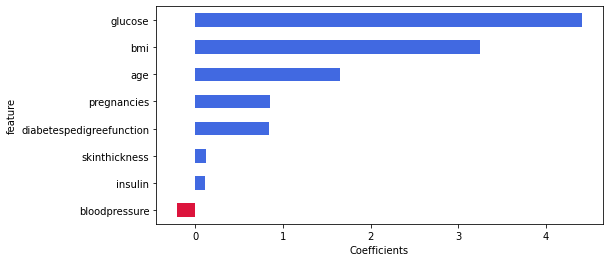

In [0]:
# save coefficients
coeff = list(logistic_reg.coef_[0])
labels = list(features_train.columns)
feature_importance = pd.DataFrame()

feature_importance['feature'] = labels
feature_importance['importance'] = coeff
feature_importance.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importance['positive'] = feature_importance['importance'] > 0
feature_importance.set_index('feature', inplace=True)
plt.figure(figsize=(8,4))

feature_importance.importance.plot(kind='barh', color=feature_importance.positive.map({True:'royalblue', False:'crimson'}))
plt.xlabel('Coefficients')

#### Confusion Matrix

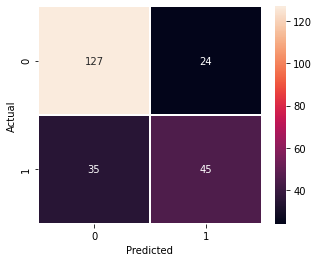

In [0]:
conf_matrix = confusion_matrix(target_test, target_predicted)
plot_confusion_matrix(conf_matrix)

#### Model Performance

In [0]:
get_model_performance(conf_matrix)

Precision: 65.22%
Recall: 56.25%


#### ROC Curve

AUC of ROC Curve: 0.72


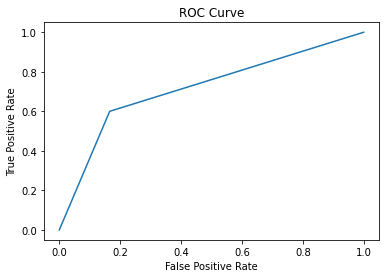

In [0]:
plot_roc_curve(target_test, target_predicted)

### Support Vector Machine (SVM)


In [0]:
# defines an SVM with a seed of 42
SVM = SVC(random_state=42)

# train the model and predict values
result_svm = SVM.fit(features_train, target_train)
target_predicted = SVM.predict(features_test)
accuracy_svm = SVM.score(features_test, target_test)

# print accuracy
print("Test Accuracy {:.2%}".format(accuracy_svm)) 

Test Accuracy 75.32%


#### Confusion Matrix

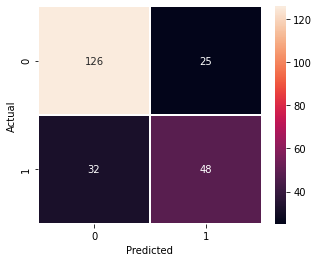

In [0]:
conf_matrix = confusion_matrix(target_test, target_predicted)
plot_confusion_matrix(conf_matrix)

#### Model Performance

In [0]:
get_model_performance(conf_matrix)

Precision: 65.75%
Recall: 60.00%


#### ROC Curve

AUC of ROC Curve: 0.72


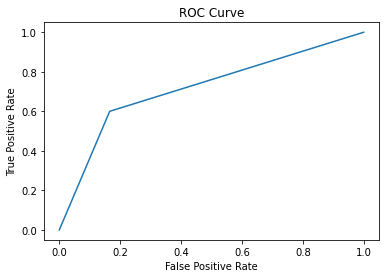

In [0]:
plot_roc_curve(target_test, target_predicted)

### Decision Tree

In [0]:
# defines the decision tree
decision_tree = DecisionTreeClassifier()

# train the model and predict values
result_dt = decision_tree.fit(features_train, target_train)
target_predicted = decision_tree.predict(features_test)
accuracy_dt = decision_tree.score(features_test, target_test)

# print accuracy
print("Test Accuracy {:.2%}".format(accuracy_dt)) 

Test Accuracy 69.70%


#### Confusion Matrix

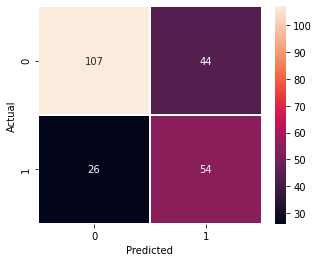

In [0]:
conf_matrix = confusion_matrix(target_test, target_predicted)
plot_confusion_matrix(conf_matrix)

#### Model Performance

In [0]:
get_model_performance(conf_matrix)

Precision: 55.10%
Recall: 67.50%


#### ROC Curve

AUC of ROC Curve: 0.69


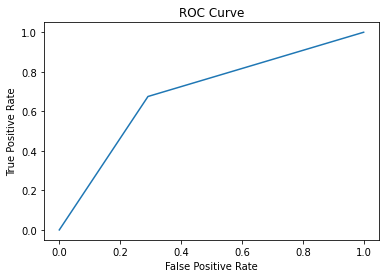

In [0]:
plot_roc_curve(target_test, target_predicted)

### Random Forest

In [0]:
# create dictionary of estimator values and accuracies
estimators = {}
for num_estimators in range(1,30):
  # defines the random forest with a seed of 42
  random_forest = RandomForestClassifier(n_estimators=num_estimators, random_state=42)

  # train the model and predict values
  result_rf = random_forest.fit(features_train, target_train)
  target_predicted = random_forest.predict(features_test)
  accuracy_rf = random_forest.score(features_test, target_test)

  # save number of estimators and corresponding accuracy
  estimators[accuracy_rf] = num_estimators

estimators = pd.DataFrame.from_dict(estimators, 
                                    orient='index').reset_index().rename(columns={"index":"accuracy",0:"estimators"})

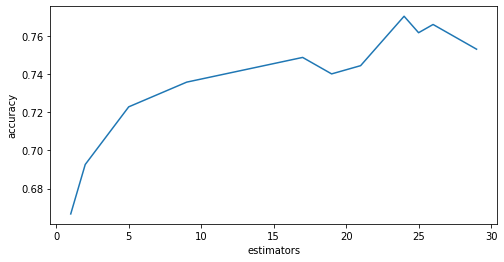

In [0]:
# plot number of estimators and accuracies
plt.figure(figsize=(8,4))
sns.lineplot(x="estimators", y="accuracy", data=estimators)

In [0]:
# defines the random forest with a seed of 42 and the number of estimators obtained above
num_estimators = estimators[estimators.accuracy == estimators.accuracy.max()].estimators.values[0]
print(f"Random Forest using {num_estimators} estimators")
random_forest = RandomForestClassifier(n_estimators=num_estimators, random_state=42)

# train the model and predict values
result_rf = random_forest.fit(features_train, target_train)
target_predicted = random_forest.predict(features_test)
accuracy_rf = random_forest.score(features_test, target_test)

# print accuracy
print("Test Accuracy {:.2%}".format(accuracy_rf)) 

Random Forest using 24 estimators
Test Accuracy 77.06%


#### Confusion Matrix

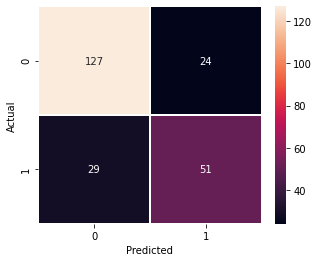

In [0]:
conf_matrix = confusion_matrix(target_test, target_predicted)
plot_confusion_matrix(conf_matrix)

#### Model Performance

In [0]:
get_model_performance(conf_matrix)

Precision: 68.00%
Recall: 63.75%


#### ROC Curve

AUC of ROC Curve: 0.74


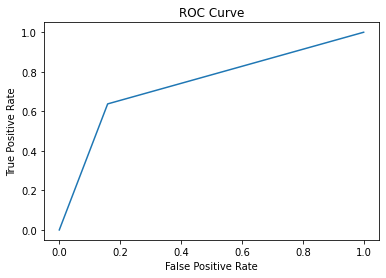

In [0]:
plot_roc_curve(target_test, target_predicted)

<a id="benchmarks"></a> <br> 
## 7. Model Benchmarking


### Accuracy

[Text(0.06, 0.743, '0.745'),
 Text(1.06, 0.751, '0.753'),
 Text(2.06, 0.695, '0.697'),
 Text(3.06, 0.769, '0.771')]

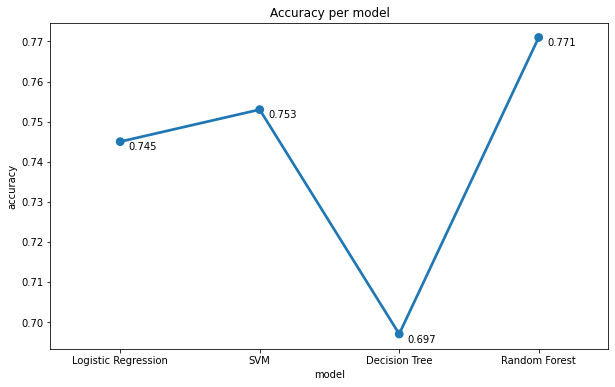

In [0]:
accuracies = [accuracy_logit, accuracy_svm, accuracy_dt, accuracy_rf]
names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
results = pd.DataFrame({"model":names, "accuracy":accuracies})
results['accuracy'] = results['accuracy'].round(3)

# plot models and their accuracies
plt.figure(figsize=(10,6))
ax = sns.pointplot(x="model", y="accuracy", data=results)
plt.title("Accuracy per model")

# set data point labels
[ax.text(p[0]+0.06, p[1]-0.002, p[1]) for p in zip(ax.get_xticks(), results.accuracy)]